In [ ]:
import pandas as pd
import zipfile
import os
from google.colab import drive
import matplotlib.pyplot as plt

drive.mount('/content/MyDrive/')

dir_path = '/content/MyDrive/MyDrive/City of Boston: Transit & Performance A/Data Files/'
files = files = os.listdir(dir_path)

Mounted at /content/MyDrive/


In [ ]:
MBTA_data = pd.read_csv(os.path.join(dir_path, 'MBTA_Systemwide_GTFS_Map.csv'))

In [ ]:
census = pd.read_csv(os.path.join(dir_path, 'Census-Boston-Neighborhood.csv'))

### CLEAN DATA


Below, we cleaned the MBTA dataset by removing all null values in the neighborhood column, as well as null or N/A values in the routes column. We did this because we don't have data on routes that aren't in the Greater Boston area.

In [ ]:
MBTA_data = MBTA_data[MBTA_data['Neighborhood'].notnull()]
# Save the filtered data back to a CSV
# MBTA_data.to_csv('path_to_output_file.csv', index=False)

In [ ]:
MBTA_data = MBTA_data[MBTA_data['Routes'] != '#N/A']
MBTA_data = MBTA_data[MBTA_data['Routes'].notnull()]

In [ ]:
# Split routes column to separate routes
MBTA_data['Routes'] = MBTA_data['Routes'].str.split('|')
MBTA_data = MBTA_data.explode('Routes')

Below, I made a new dataframe with relevant columns for this analysis. The relevant columns include data for the total demographic numbers.

In [ ]:
census_total = census.iloc[:, :7]
census_total.head()

,tract20_nbhd,P0020001,P0020005,P0020006,P0020002,P002aapi,P002others
0,field concept,Total:,White alone,Black or African American alone,Hispanic or Latino,"Asian, Native Hawaiian and Pacific Islander al...","Other Races or Multiple Races, all ages"
1,Allston,24904,12536,1326,3259,6271,1512
2,Back Bay,18190,13065,690,1208,2410,817
3,Beacon Hill,9336,7521,252,537,630,396
4,Brighton,52047,32694,2414,5376,8703,2860


**Made** a new dataframe by duplicating rows with routes that had a format of [x|y|z] so that the new df has rows with x, y and z separated.

In [ ]:
#Split the routes
MBTA_data['Routes'] = MBTA_data['Routes'].str.split('|')
MBTA_data = MBTA_data.explode('Routes')

In [ ]:
MBTA_data.head()

,X,Y,OBJECTID,stop_id,stop_code,stop_name,stop_desc,platform_code,platform_name,stop_lat,...,Sidewalk_Condition,Sidewalk_Material,Current_Shelter,Routes,Municipality_1,Neighborhood,created_user,created_date,last_edited_user,last_edited_date
0,-71.082754,42.330957,647997,1,1.0,Washington St opp Ruggles St,NaN,NaN,NaN,42.330957,...,Good,Brick,JCD,1,BOSTON,Roxbury,DOT_ADMIN,2023/05/30 14:10:22+00,DOT_ADMIN,2023/05/30 14:10:22+00
0,-71.082754,42.330957,647997,1,1.0,Washington St opp Ruggles St,NaN,NaN,NaN,42.330957,...,Good,Brick,JCD,8,BOSTON,Roxbury,DOT_ADMIN,2023/05/30 14:10:22+00,DOT_ADMIN,2023/05/30 14:10:22+00
0,-71.082754,42.330957,647997,1,1.0,Washington St opp Ruggles St,NaN,NaN,NaN,42.330957,...,Good,Brick,JCD,10,BOSTON,Roxbury,DOT_ADMIN,2023/05/30 14:10:22+00,DOT_ADMIN,2023/05/30 14:10:22+00
0,-71.082754,42.330957,647997,1,1.0,Washington St opp Ruggles St,NaN,NaN,NaN,42.330957,...,Good,Brick,JCD,47,BOSTON,Roxbury,DOT_ADMIN,2023/05/30 14:10:22+00,DOT_ADMIN,2023/05/30 14:10:22+00
0,-71.082754,42.330957,647997,1,1.0,Washington St opp Ruggles St,NaN,NaN,NaN,42.330957,...,Good,Brick,JCD,19,BOSTON,Roxbury,DOT_ADMIN,2023/05/30 14:10:22+00,DOT_ADMIN,2023/05/30 14:10:22+00


In [ ]:
merged = pd.merge(MBTA_data, census, left_on='Neighborhood', right_on='tract20_nbhd')

In [ ]:
merged.head(2)

,X,Y,OBJECTID,stop_id,stop_code,stop_name,stop_desc,platform_code,platform_name,stop_lat,...,P0050005,P0050006,P0050007,P0050008,P0050009,P0050010,H0010001,H0010002,H0010003,hhsize
0,-71.082754,42.330957,647997,1,1.0,Washington St opp Ruggles St,NaN,NaN,NaN,42.330957,...,0,41,3553,2520,0,1033,21687,20025,1662,2.499525593
1,-71.082754,42.330957,647997,1,1.0,Washington St opp Ruggles St,NaN,NaN,NaN,42.330957,...,0,41,3553,2520,0,1033,21687,20025,1662,2.499525593


In [ ]:
# Mapping of old column names to new names
new_column_names = {
    'P0020005': 'White',
    'P0020006': 'Black',
    'P0020002': 'Hispanic',
    'P002aapi': 'Asian',
    'P002others': 'Other'
}

# Rename the columns
merged.rename(columns=new_column_names, inplace=True)

# ['White', 'Black', 'Hispanic', 'Asian', 'Other']


### Making a graph for demographics per neighbourhood

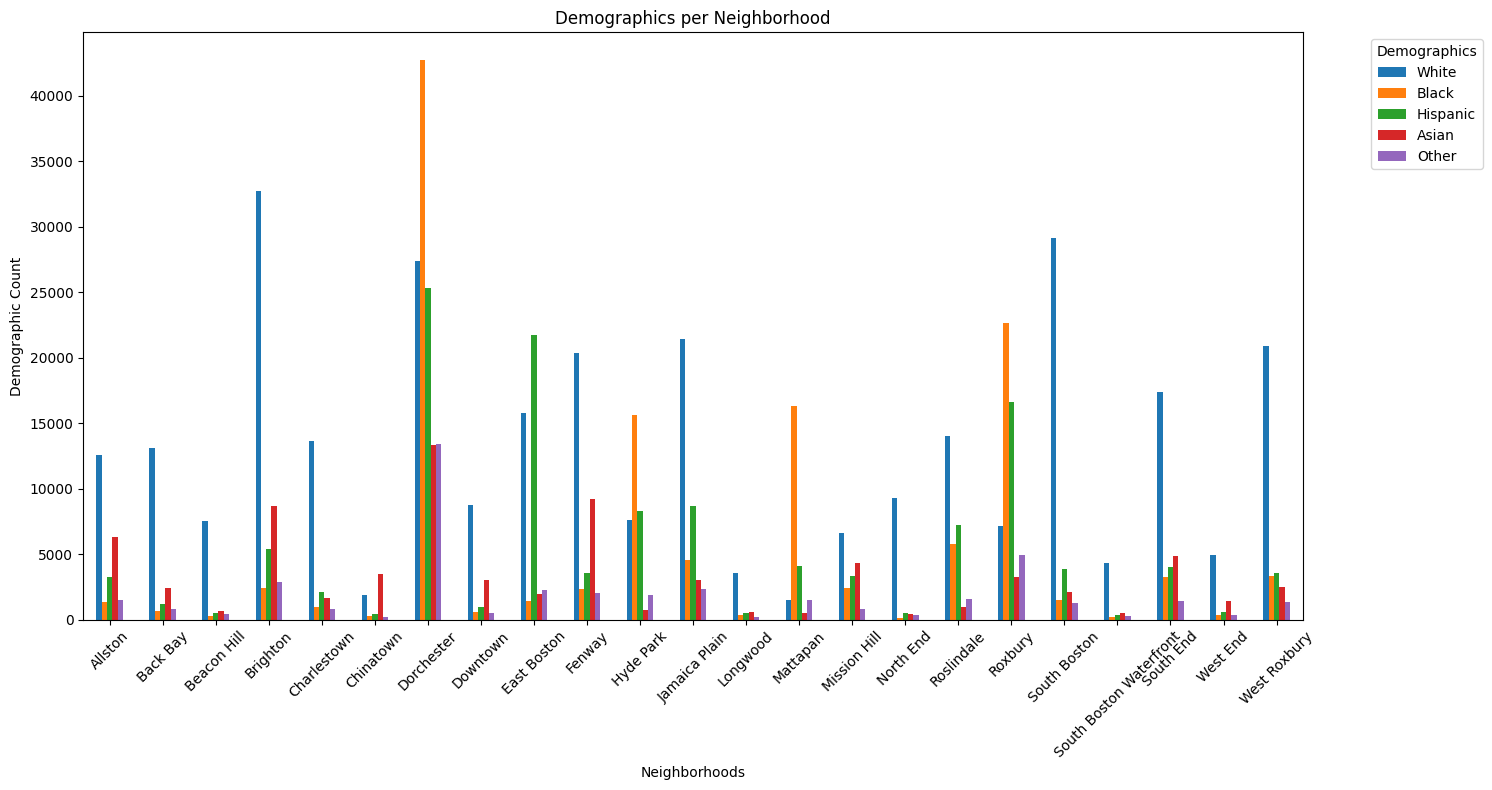

In [ ]:
# Calculate averages for each neighborhood
average_demographics_neighborhood = merged.groupby('Neighborhood')[['White', 'Black', 'Hispanic', 'Asian', 'Other']].mean()

# Creating a grouped bar chart to visualize the average demographics per Neighborhood
plt.figure(figsize=(15, 8))

# Plotting the data
average_demographics_neighborhood.plot(kind='bar', ax=plt.gca())

# Setting plot title and labels
plt.title('Demographics per Neighborhood')
plt.xlabel('Neighborhoods')
plt.ylabel('Demographic Count')
plt.xticks(rotation=45)
plt.legend(title='Demographics', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()

###Average demographics of specific routes

In [ ]:
# Convert demographic columns to numeric
cols_to_convert = ['P0020005', 'P0020006', 'P0020002', 'P002aapi', 'P002others', 'P0020001']
for col in cols_to_convert:
    merged[col] = pd.to_numeric(merged[col], errors='coerce')

# Convert counts to percentages
for col in []:
    merged[col] = merged[col] / merged['P0020001'] * 100

# Calculate averages
average_demographics = merged.groupby('Routes')[['P0020005', 'P0020006', 'P0020002', 'P002aapi', 'P002others']].mean()


Double check whether there are values we don't want in our df (inf values).

In [ ]:
import numpy as np

average_demographics.replace([np.inf, -np.inf], np.nan, inplace=True)
average_demographics.dropna(inplace=True)

new_column_names = {
    'P0020005': 'White',
    'P0020006': 'Black',
    'P0020002': 'Hispanic',
    'P002aapi': 'Asian',
    'P002others': 'Other'
}

# Rename the columns
average_demographics.rename(columns=new_column_names, inplace=True)

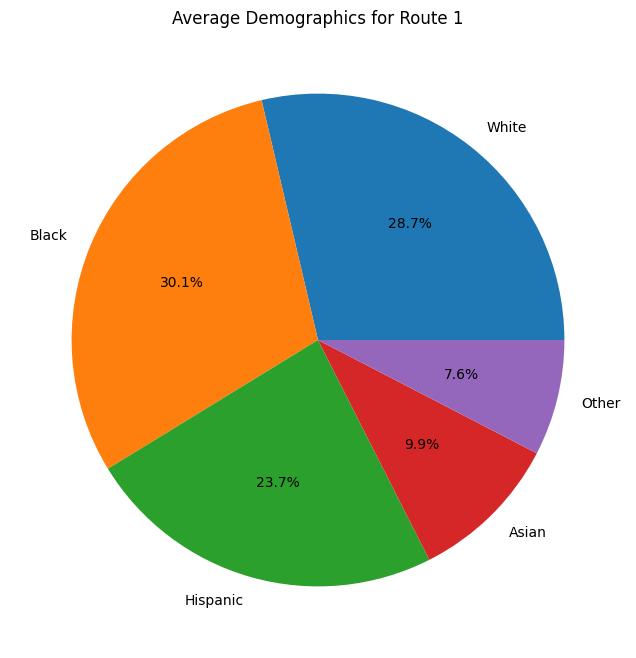

In [ ]:
import matplotlib.pyplot as plt

# Select data for Route '1'
route = '1'
route_data = average_demographics.loc[route]

# Create a pie chart
plt.figure(figsize=(8, 8))
route_data.plot(kind='pie', autopct='%1.1f%%')
plt.title(f'Average Demographics for Route {route}')
plt.ylabel('')  # Hide the y-label for clarity
plt.show()


For the worst times, the cleaning of this dataset required for some rows to be removed due to empty values for 'Neighborhood', a column we needed. So below, 195 was supposed to be in the top 10 worst on-time routes, but it was filtered out on this dataset that we're working with. So, we found the next worst on-time route to replace this.

In [ ]:
# List of routes with the worst on-time rate based on on-time analysis
worst_on_time_routes = ['14', '70A', '19', '701', '41', '747', '459', '448', '449', '9703']
best_on_time_routes = ['741', '7', '746', '742', '31', '502', '32', '749', '111', '751']

# Filter the average demographics DataFrame for these routes
worst_routes_demographics = average_demographics.loc[worst_on_time_routes]
worst_routes_percentages = worst_routes_demographics.div(worst_routes_demographics.sum(axis=1), axis=0) * 100
best_routes_demographics = average_demographics.loc[best_on_time_routes]
best_routes_percentages = best_routes_demographics.div(best_routes_demographics.sum(axis=1), axis=0) * 100

Graphed below the demographic distribution for the top 10 (unfiltered) routes.

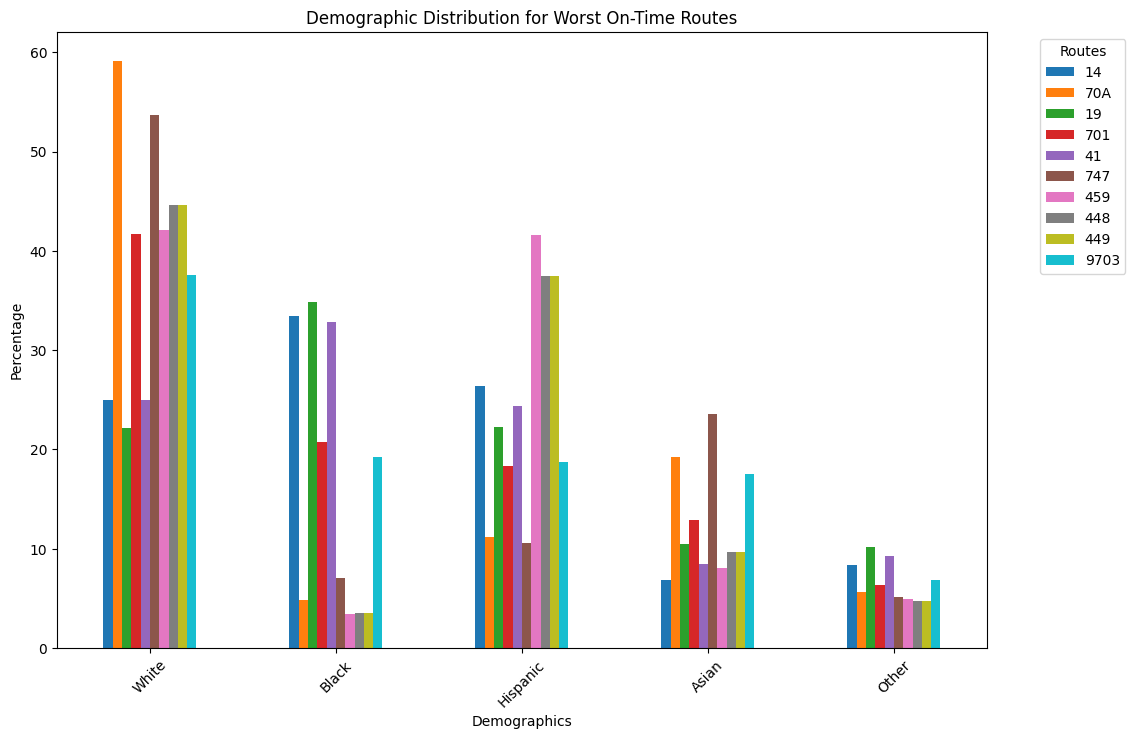

In [ ]:
import matplotlib.pyplot as plt

# Transpose the DataFrame to have routes as columns
transposed_data = worst_routes_percentages.transpose()

# Plot a bar chart
transposed_data.plot(kind='bar', figsize=(12, 8))

plt.title('Demographic Distribution for Worst On-Time Routes')
plt.xlabel('Demographics')
plt.ylabel('Percentage')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Routes', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move the legend outside the plot
plt.show()


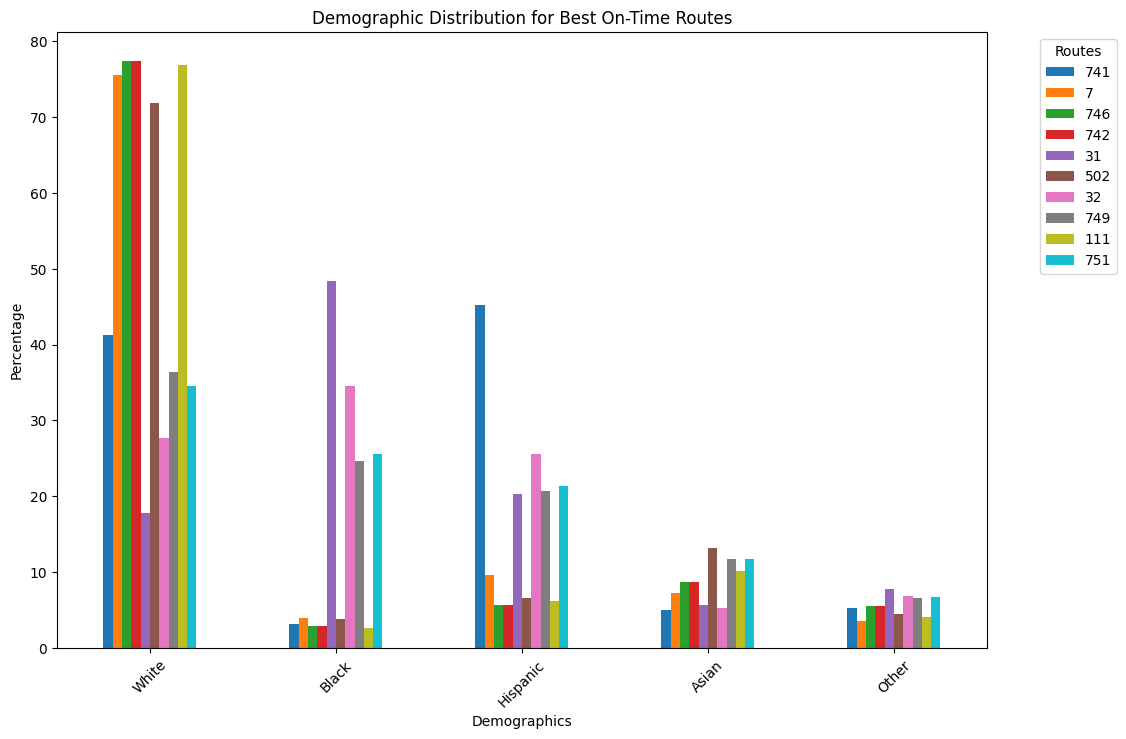

In [ ]:
import matplotlib.pyplot as plt

# Transpose the DataFrame to have routes as columns
transposed_data = best_routes_percentages.transpose()

# Plot a bar chart
transposed_data.plot(kind='bar', figsize=(12, 8))

plt.title('Demographic Distribution for Best On-Time Routes')
plt.xlabel('Demographics')
plt.ylabel('Percentage')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Routes', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move the legend outside the plot
plt.show()


###DATA BY AGE AND ETHNIC GROUP


In [ ]:
# Make new df from the census dataset for 18+
eighteen = ['tract20_nbhd'] + census.columns[7:13].tolist()
census_18 = census[eighteen]
# Make new df from the census dataset for 17-
underage = ['tract20_nbhd'] + census.columns[13:19].tolist()
census_under = census[underage]
census_under.head(10)

,tract20_nbhd,P00x0001,P00x0005,P00x0006,P00x0002,P00xaapi,P00xothers
0,field concept,NaN,"White alone, aged 0-17","Black or African American alone, aged 0-17","Hispanic or Latino, aged 0-17","Asian, Native Hawaiian and Pacific Islander al...","Other Races or Multiple Races, aged 0-17"
1,Allston,1764.0,560,142,533,311,218
2,Back Bay,1148.0,716,49,117,120,146
3,Beacon Hill,733.0,541,21,62,15,94
4,Brighton,4390.0,1942,338,988,621,501
5,Charlestown,3459.0,1937,328,688,246,260
6,Chinatown,734.0,103,38,61,509,23
7,Dorchester,26826.0,3084,10036,7895,2485,3326
8,Downtown,793.0,390,10,79,201,113
9,East Boston,8240.0,1721,267,5444,218,590


In [ ]:
# Merge with MBTA data
merged_18 = pd.merge(MBTA_data, census_18, left_on='Neighborhood', right_on='tract20_nbhd')
merged_17 = pd.merge(MBTA_data, census_under, left_on='Neighborhood', right_on='tract20_nbhd')


In [ ]:
# Convert demographic columns to numeric
cols_to_convert = ['P0040005', 'P0040006', 'P0040002', 'P004aapi', 'P004others']
for col in cols_to_convert:
    merged_18[col] = pd.to_numeric(merged_18[col], errors='coerce')

# Convert counts to percentages
for col in []:
    merged_18[col] = merged_18[col] / merged_18['P0040001'] * 100

# Calculate averages
averages_18 = merged_18.groupby('Routes')[['P0040005', 'P0040006', 'P0040002', 'P004aapi', 'P004others']].mean()


In [ ]:
# Convert demographic columns to numeric
cols_to_convert = ['P00x0005', 'P00x0006', 'P00x0002', 'P00xaapi', 'P00xothers']
for col in cols_to_convert:
    merged_17[col] = pd.to_numeric(merged_17[col], errors='coerce')

# Convert counts to percentages
for col in []:
    merged_17[col] = merged_17[col] / merged_17['P00x0001'] * 100

# Calculate averages
averages_17 = merged_17.groupby('Routes')[['P00x0005', 'P00x0006', 'P00x0002', 'P00xaapi', 'P00xothers']].mean()


In [ ]:
# Mapping of old column names to new names
eighteen_column_names = {
    'P0040005': 'White',
    'P0040006': 'Black',
    'P0040002': 'Hispanic',
    'P004aapi': 'Asian',
    'P004others': 'Other'
}
averages_18.rename(columns=eighteen_column_names, inplace=True)

# Mapping of old column names to new names
seventeen_column_names = {
    'P00x0005': 'White',
    'P00x0006': 'Black',
    'P00x0002': 'Hispanic',
    'P00xaapi': 'Asian',
    'P00xothers': 'Other'
}
averages_17.rename(columns=seventeen_column_names, inplace=True)





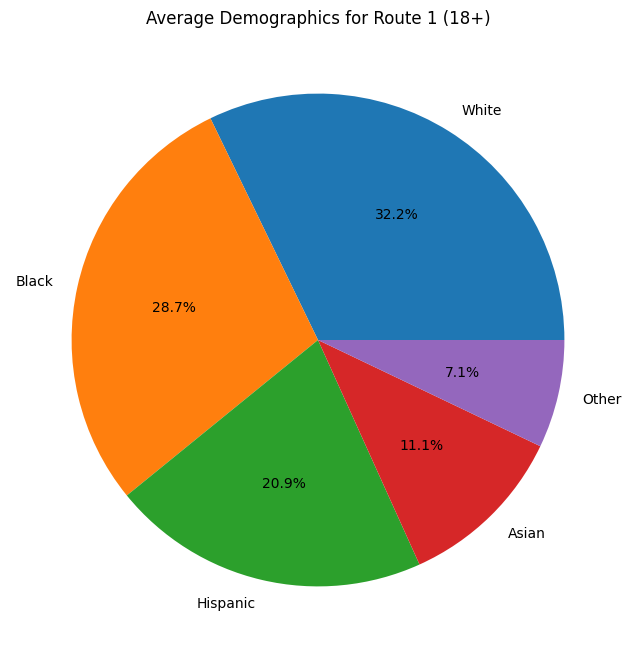

In [ ]:
import matplotlib.pyplot as plt

# Select data for Route '1'
route = '1'
route_data = averages_18.loc[route]

# Create a pie chart
plt.figure(figsize=(8, 8))
route_data.plot(kind='pie', autopct='%1.1f%%')
plt.title(f'Average Demographics for Route {route} (18+)')
plt.ylabel('')  # Hide the y-label for clarity
plt.show()


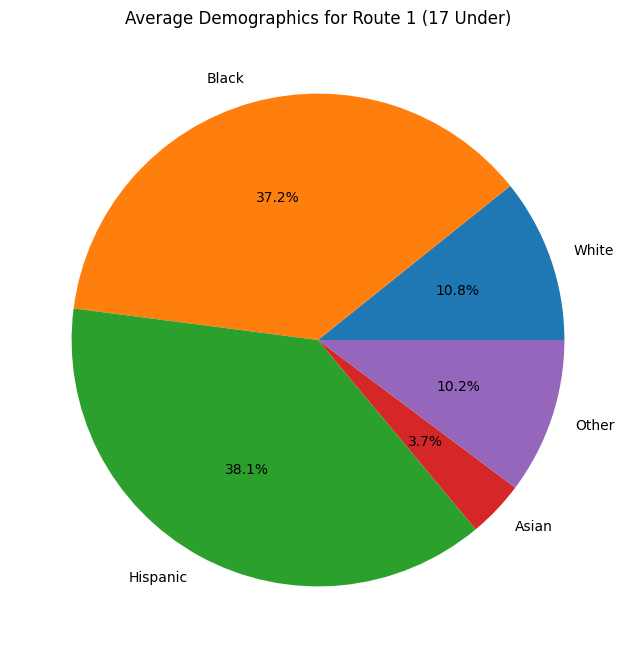

In [ ]:
import matplotlib.pyplot as plt

# Select data for Route '1'
route = '1'
route_data = averages_17.loc[route]

# Create a pie chart
plt.figure(figsize=(8, 8))
route_data.plot(kind='pie', autopct='%1.1f%%')
plt.title(f'Average Demographics for Route {route} (17 Under)')
plt.ylabel('')  # Hide the y-label for clarity
plt.show()


In [ ]:
# Filter the average demographics DataFrame for these routes
worst_routes_demographics_18 = averages_18.loc[worst_on_time_routes]
worst_routes_demographics_17 = averages_17.loc[worst_on_time_routes]
worst_routes_demo_18 = worst_routes_demographics_18.div(worst_routes_demographics_18.sum(axis=1), axis=0) * 100
worst_routes_demo_17 = worst_routes_demographics_17.div(worst_routes_demographics_17.sum(axis=1), axis=0) * 100



In [ ]:
import matplotlib.pyplot as plt

# Transpose the DataFrame to have routes as columns
transposed_data_18 = worst_routes_demo_18.transpose()
transposed_data_17 = worst_routes_demo_17.transpose()

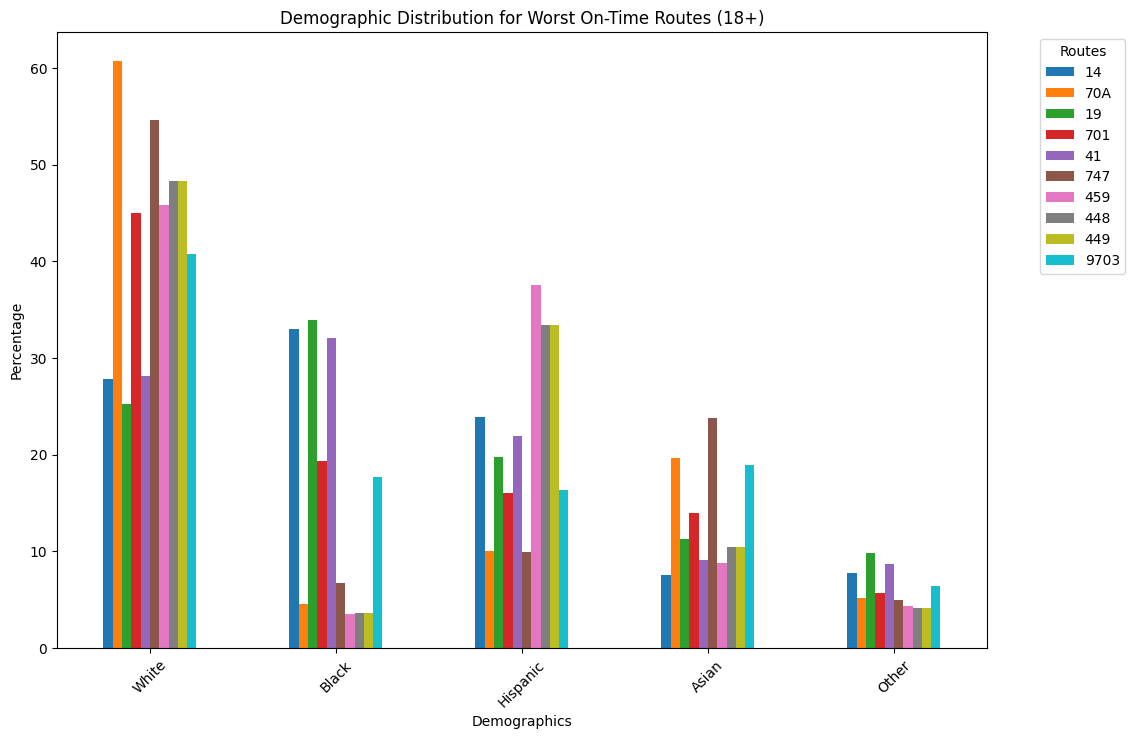

In [ ]:
# Plot a bar chart
transposed_data_18.plot(kind='bar', figsize=(12, 8))

plt.title('Demographic Distribution for Worst On-Time Routes (18+)')
plt.xlabel('Demographics')
plt.ylabel('Percentage')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Routes', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move the legend outside the plot
plt.show()


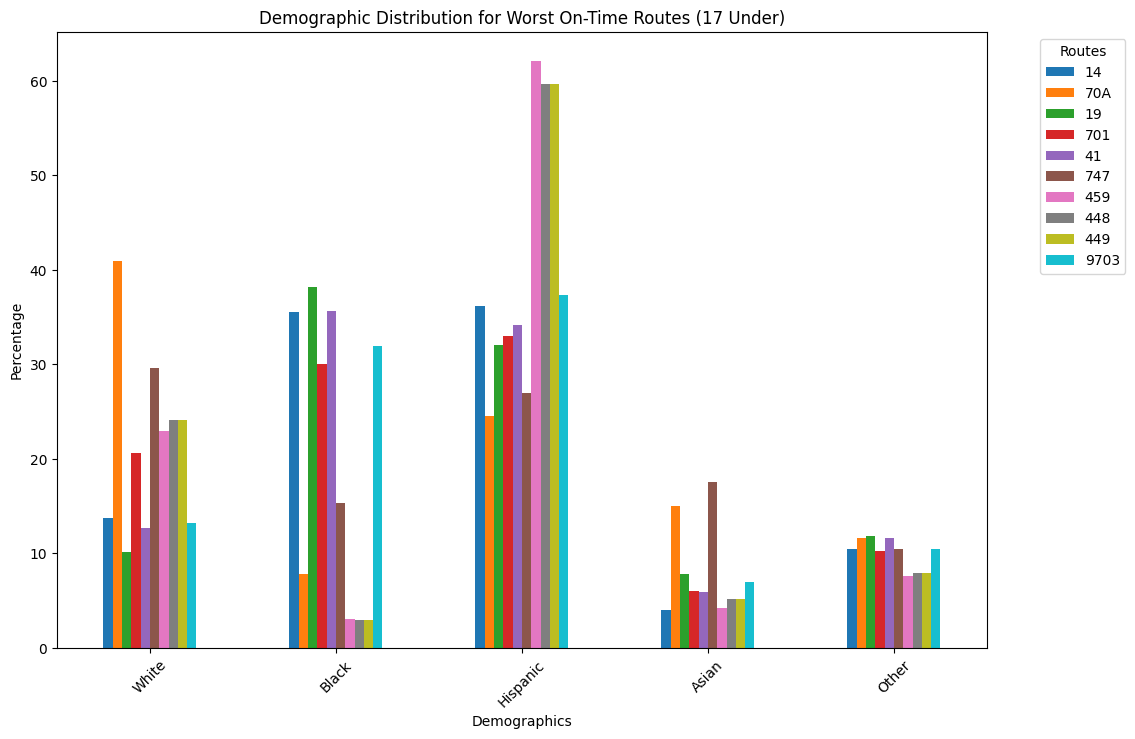

In [ ]:
# Plot a bar chart
transposed_data_17.plot(kind='bar', figsize=(12, 8))

plt.title('Demographic Distribution for Worst On-Time Routes (17 Under)')
plt.xlabel('Demographics')
plt.ylabel('Percentage')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Routes', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move the legend outside the plot
plt.show()


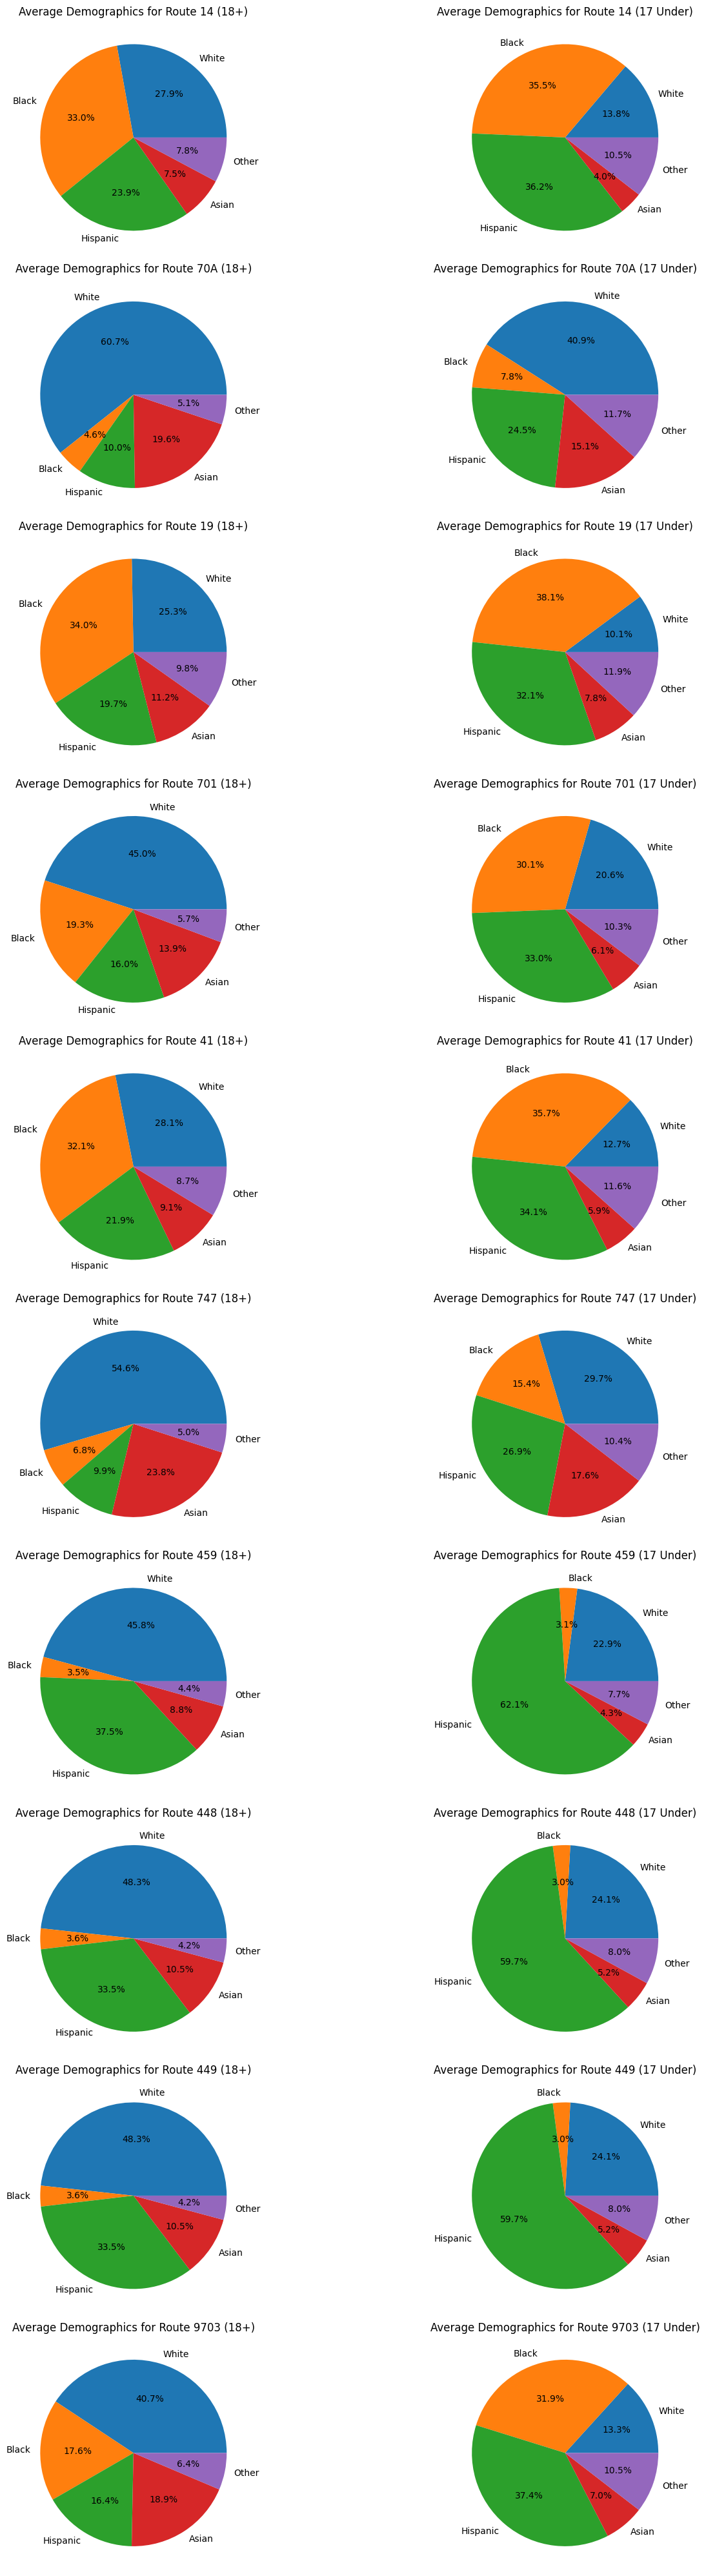

In [ ]:
import matplotlib.pyplot as plt

# List of worst on-time routes
worst_on_time_routes = ['14', '70A', '19', '701', '41', '747', '459', '448', '449', '9703']

# Set up a large figure to hold all subplots
plt.figure(figsize=(16, 40))

# Loop over each route and create subplots
for i, route in enumerate(worst_on_time_routes):
    # Data for 18+ and 17 under demographics
    route_data_18 = averages_18.loc[route]
    route_data_17 = averages_17.loc[route]

    # Plot for 18+ demographics
    plt.subplot(len(worst_on_time_routes), 2, 2*i + 1)  # Row count, 2 columns, current subplot position
    route_data_18.plot(kind='pie', autopct='%1.1f%%')
    plt.title(f'Average Demographics for Route {route} (18+)')
    plt.ylabel('')

    # Plot for 17 and under demographics
    plt.subplot(len(worst_on_time_routes), 2, 2*i + 2)
    route_data_17.plot(kind='pie', autopct='%1.1f%%')
    plt.title(f'Average Demographics for Route {route} (17 Under)')
    plt.ylabel('')

plt.tight_layout()
plt.show()


In [ ]:
# Convert the relevant columns to numeric
census['P0050004'] = pd.to_numeric(census['P0050004'], errors='coerce')
census['P00x0001'] = pd.to_numeric(census['P00x0001'], errors='coerce')
census['P0050008'] = pd.to_numeric(census['P0050008'], errors='coerce')
census['P0040001'] = pd.to_numeric(census['P0040001'], errors='coerce')

# Calculate the Juvenile Facility Rate
census['Juvenile_Facility_Rate'] = census['P0050004'] / census['P00x0001']
# Calculate university rate among 18+
census['University_Rate'] = census['P0050008']/census['P0040001']
census.head()

,tract20_nbhd,P0020001,P0020005,P0020006,P0020002,P002aapi,P002others,P0040001,P0040005,P0040006,...,P0050007,P0050008,P0050009,P0050010,H0010001,H0010002,H0010003,hhsize,Juvenile_Facility_Rate,University_Rate
0,field concept,Total:,White alone,Black or African American alone,Hispanic or Latino,"Asian, Native Hawaiian and Pacific Islander al...","Other Races or Multiple Races, all ages",NaN,White alone,Black or African American alone,...,Noninstitutionalized population:,NaN,Military quarters,Other noninstitutional facilities,Total:,Occupied,Vacant,household size,NaN,NaN
1,Allston,24904,12536,1326,3259,6271,1512,23140.0,11976,1184,...,3281,3214.0,0,67,10748,10027,721,2.156477511,0.000000,0.138894
2,Back Bay,18190,13065,690,1208,2410,817,17042.0,12349,641,...,1610,1487.0,0,123,11524,10006,1518,1.630121927,0.000000,0.087255
3,Beacon Hill,9336,7521,252,537,630,396,8603.0,6980,231,...,33,0.0,0,33,6037,5485,552,1.696080219,0.000000,0.000000
4,Brighton,52047,32694,2414,5376,8703,2860,47657.0,30752,2076,...,3796,3493.0,0,303,23653,22535,1118,2.126292434,0.002961,0.073295


In [ ]:
best_on_time_routes = ['741', '7', '746', '742', '31', '502', '32', '749', '111', '751']

MBTA_merged = pd.merge(MBTA_data, census, left_on='Neighborhood', right_on='tract20_nbhd')
# Group by route and calculate mean juvenile facility rate'
average_juvenile_rate = MBTA_merged.groupby('Routes')['Juvenile_Facility_Rate'].mean()
# Filter for the worst routes
worst_routes_juvenile_rate = average_juvenile_rate.loc[worst_on_time_routes]
avgjuv = worst_routes_juvenile_rate.mean()
print(avgjuv)
# Filter for the best routes
best_routes_juvenile_rate = average_juvenile_rate.loc[best_on_time_routes]
bestjuv = best_routes_juvenile_rate.mean()
print(bestjuv)

0.004258801211606094
0.003684154338243044


In [ ]:
average_uni_rate = MBTA_merged.groupby('Routes')['University_Rate'].mean()

worst_routes_university_rate = average_uni_rate.loc[worst_on_time_routes]
avg_worst_uni = worst_routes_university_rate.mean()
best_routes_university_rate = average_uni_rate.loc[best_on_time_routes]
avg_best_uni = best_routes_university_rate.mean()
print(avg_worst_uni, avg_best_uni)

0.15101369706642723 0.026243017831084604


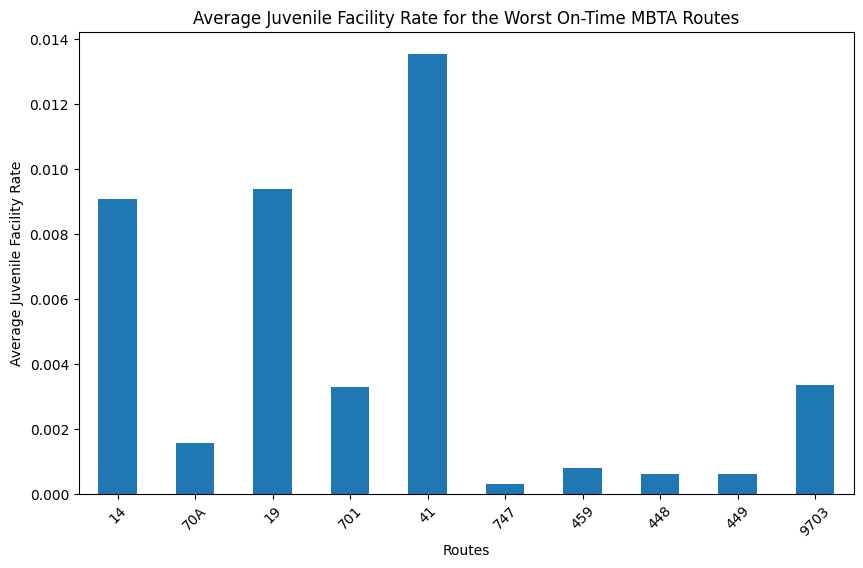

In [ ]:
import matplotlib.pyplot as plt

# Create a bar chart for the worst routes' juvenile facility rate
plt.figure(figsize=(10, 6))
worst_routes_juvenile_rate.plot(kind='bar')

plt.title('Average Juvenile Facility Rate for the Worst On-Time MBTA Routes')
plt.xlabel('Routes')
plt.ylabel('Average Juvenile Facility Rate')
plt.xticks(rotation=45)

# Display the plot
plt.show()


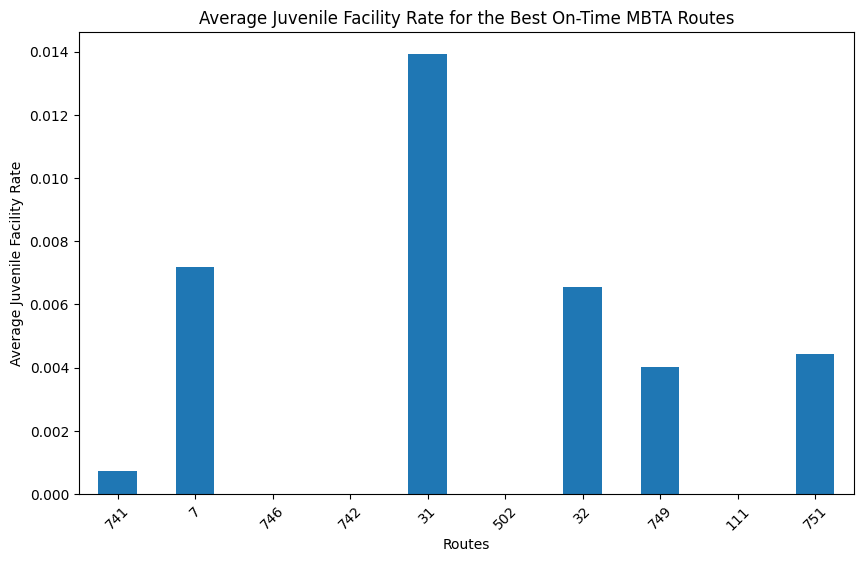

In [ ]:
import matplotlib.pyplot as plt

# Create a bar chart for the worst routes' juvenile facility rate
plt.figure(figsize=(10, 6))
best_routes_juvenile_rate.plot(kind='bar')

plt.title('Average Juvenile Facility Rate for the Best On-Time MBTA Routes')
plt.xlabel('Routes')
plt.ylabel('Average Juvenile Facility Rate')
plt.xticks(rotation=45)

# Display the plot
plt.show()


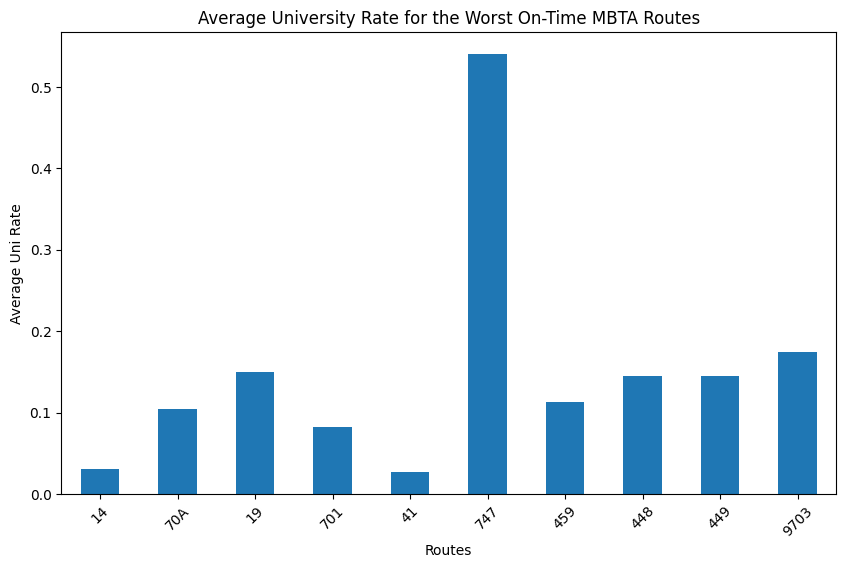

In [ ]:
import matplotlib.pyplot as plt

# Create a bar chart for the worst routes' uni  rate
plt.figure(figsize=(10, 6))
worst_routes_university_rate.plot(kind='bar')

plt.title('Average University Rate for the Worst On-Time MBTA Routes')
plt.xlabel('Routes')
plt.ylabel('Average Uni Rate')
plt.xticks(rotation=45)

# Display the plot
plt.show()


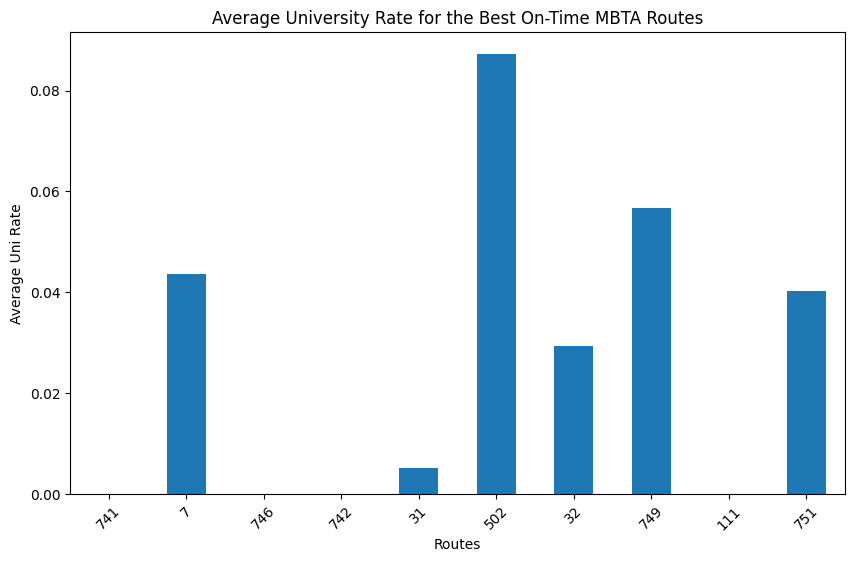

In [ ]:
import matplotlib.pyplot as plt

# Create a bar chart for the best routes' uni  rate
plt.figure(figsize=(10, 6))
best_routes_university_rate.plot(kind='bar')

plt.title('Average University Rate for the Best On-Time MBTA Routes')
plt.xlabel('Routes')
plt.ylabel('Average Uni Rate')
plt.xticks(rotation=45)

# Display the plot
plt.show()
